In [ ]:
import pandas as pd
import numpy as np

In [ ]:
xls = pd.ExcelFile("XTern 2024 Artificial Intelegence Data Set.xlsx")
df_menu = pd.read_excel(xls, sheet_name='Menu')
df_data = pd.read_excel(xls, sheet_name='Xtern_TrainData')

Data Distributions and biases

In [ ]:
df_data.Time.value_counts()

Time
13    1316
12    1314
14     883
11     857
15     282
10     247
16      49
9       40
8        8
17       4
Name: count, dtype: int64

In [ ]:
df_data.Order.value_counts()

Order
Sugar Cream Pie                                             512
Indiana Pork Chili                                          510
Cornbread Hush Puppies                                      510
Sweet Potato Fries                                          508
Ultimate Grilled Cheese Sandwich (with bacon and tomato)    503
Indiana Buffalo Chicken Tacos (3 tacos)                     496
Indiana Corn on the Cob (brushed with garlic butter)        495
Breaded Pork Tenderloin Sandwich                            494
Fried Catfish Basket                                        490
Hoosier BBQ Pulled Pork Sandwich                            482
Name: count, dtype: int64

In [ ]:
df_data.University.value_counts()

University
Butler University                                            1614
Indiana State University                                     1309
Ball State University                                        1085
Indiana University-Purdue University Indianapolis (IUPUI)     682
University of Notre Dame                                      144
University of Evansville                                      143
Indiana University Bloomington                                 12
Valparaiso University                                           9
Purdue University                                               1
DePauw University                                               1
Name: count, dtype: int64

In [ ]:
df_data.Major.value_counts()

Major
Chemistry                  640
Biology                    635
Astronomy                  619
Physics                    610
Mathematics                582
Economics                  511
Business Administration    334
Political Science          309
Marketing                  239
Anthropology               146
Finance                    135
Psychology                  76
Accounting                  62
Sociology                   31
International Business      29
Music                       21
Mechanical Engineering      11
Philosophy                   4
Fine Arts                    3
Civil Engineering            3
Name: count, dtype: int64

In [ ]:
df_data.Year.value_counts()

Year
Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: count, dtype: int64

Correlation between features

In [ ]:
merged_df = df_data.merge(df_menu[['Item', 'Price', 'Calories']], left_on='Order', right_on='Item', how='left')
merged_df.drop('Item', axis=1, inplace=True)
enc = LabelEncoder()
train_data = merged_df.apply(enc.fit_transform)
train_data.corr()

,Year,Major,University,Time,Order,Price,Calories
Year,1.000000,-0.007961,0.022057,-0.015790,-0.114357,-0.241214,-0.225594
Major,-0.007961,1.000000,0.030750,-0.000367,0.018405,-0.005382,0.046920
University,0.022057,0.030750,1.000000,0.166331,-0.077829,0.135870,0.040146
Time,-0.015790,-0.000367,0.166331,1.000000,0.368199,-0.074387,0.042094
Order,-0.114357,0.018405,-0.077829,0.368199,1.000000,-0.541145,-0.267208
Price,-0.241214,-0.005382,0.135870,-0.074387,-0.541145,1.000000,0.740146
Calories,-0.225594,0.046920,0.040146,0.042094,-0.267208,0.740146,1.000000


Business insights

<Axes: ylabel='Frequency'>

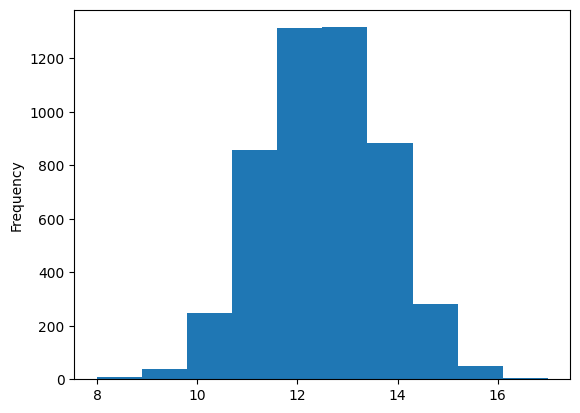

In [ ]:
# Highest Order Times
df_data.Time.plot.hist()

array([<Axes: title={'center': 'Year 1'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Year 2'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Year 3'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Year 4'}, ylabel='Frequency'>],
      dtype=object)

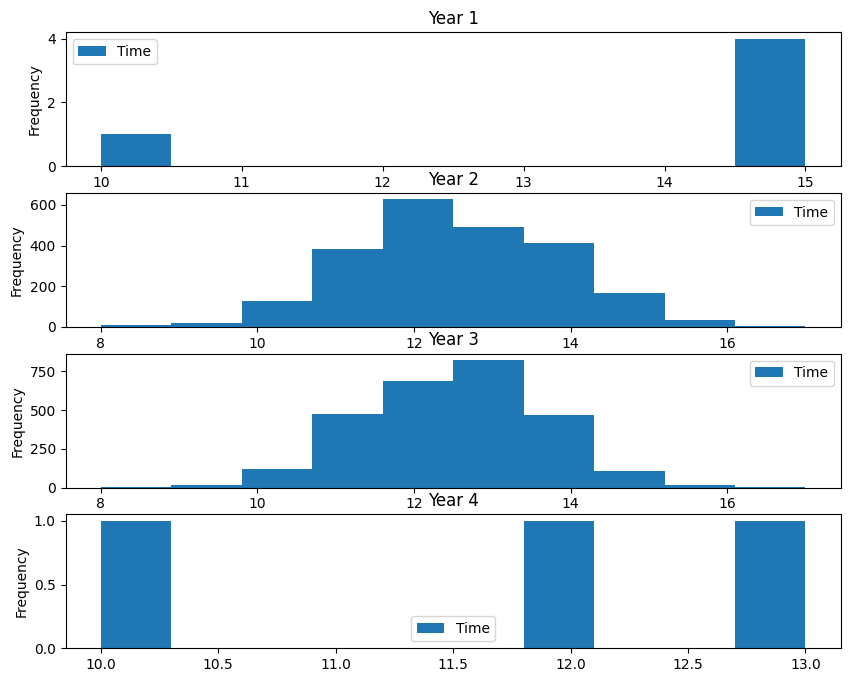

In [ ]:
merged_df[['Time', 'Year']].plot.hist(by='Year', figsize=(10,8))

In [ ]:
train_data

,Year,Major,University,Time,Order,Price,Calories
0,1,16,3,4,2,7,7
1,2,5,0,6,7,1,5
2,2,5,1,4,6,4,3
3,1,3,3,3,2,7,7
4,2,4,1,4,5,0,0
...,...,...,...,...,...,...,...
4995,1,12,0,3,0,6,6
4996,2,2,3,4,9,3,5
4997,2,5,1,5,7,1,5
4998,2,2,1,7,7,1,5


**Implications of Data Collection, Storage, and Data Biases in FoodX Promotion:**

**1. Ethical Implications:**
   - **Privacy Concerns:** Collecting student data raises privacy concerns. It's crucial to obtain explicit consent, ensuring transparency about how their data will be used and stored.
   - **Data Security:** Safeguarding this data is paramount. Implement robust security measures to prevent unauthorized access or breaches, ensuring customer trust and compliance with data protection laws.

**2. Business Outcome Implications:**
   - **Customer Trust:** Respecting privacy enhances customer trust. Transparent data practices can bolster FoodX's reputation, leading to customer loyalty and positive word-of-mouth, driving long-term business growth.
   - **Legal Compliance:** Adhering to data protection regulations is non-negotiable. Compliance avoids legal issues, potential fines, and damage to the brand’s image, safeguarding FoodX’s business continuity.

**3. Technical Implications:**
   - **Algorithm Bias:** AI algorithms might inherit biases present in the training data. Regular audits and adjustments are vital to mitigate biases, ensuring fair and accurate predictions.
   - **Data Accuracy:** Reliable predictions rely on accurate data. Implement data validation processes and maintain data integrity to enhance the AI's effectiveness in guessing orders.
   - **Scalability:** As FoodX expands, the system must handle increasing data volumes efficiently. Scalable infrastructure and algorithms are necessary to maintain performance and accuracy with a growing user base.

By addressing these ethical, business, and technical implications, FoodX can not only ensure the responsible use of student data but also optimize the accuracy and efficiency of its order prediction system, leading to enhanced customer satisfaction and sustainable business growth.

In [ ]:
y = train_data['Order']
X = train_data.drop(['Order', 'Price', 'Calories'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.52      0.48      0.50       147
           1       0.59      0.58      0.58       164
           2       0.73      0.61      0.66       155
           3       0.64      0.68      0.66       154
           4       0.52      0.60      0.56       126
           5       0.70      0.81      0.75       137
           6       0.75      0.85      0.80       142
           7       0.62      0.59      0.60       160
           8       0.66      0.55      0.60       165
           9       0.66      0.67      0.67       150

    accuracy                           0.64      1500
   macro avg       0.64      0.64      0.64      1500
weighted avg       0.64      0.64      0.64      1500



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf = RandomForestClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.64


In [ ]:
from sklearn.svm import SVC

# Create an SVM classifier
clf = SVC(kernel='rbf', random_state=42)  # You can change the kernel and C value as needed

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.53


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
clf = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classifier Accuracy: {accuracy:.2f}")


KNN Classifier Accuracy: 0.59


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
clf = LogisticRegression()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.43


d:\Files\Documents\Projects\Recommendations\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Gaussian Naive Bayes Accuracy: {accuracy:.2f}")


Gaussian Naive Bayes Accuracy: 0.49


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoostClassifier Accuracy: {accuracy:.2f}")

AdaBoostClassifier Accuracy: 0.38


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA classifier
clf = LinearDiscriminantAnalysis()

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"LDA Classifier Accuracy: {accuracy:.2f}")


LDA Classifier Accuracy: 0.44


In [ ]:
from sklearn.neural_network import MLPClassifier

# Create an MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=100, solver='adam', random_state=42)
# You can adjust the hidden_layer_sizes and other parameters as needed

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"MLP Classifier Accuracy: {accuracy:.2f}")


MLP Classifier Accuracy: 0.53


d:\Files\Documents\Projects\Recommendations\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import pickle
from datetime import datetime
import os
def save_model(clf):
    filename = "Model_" + datetime.now().strftime('%Y-%m-%d__%H-%M') + '.pickle'
    pickle.dump(clf, open(filename, "wb"))

def load_model(filename):
    if os.path.exists(filename):
        loaded_model = pickle.load(open(filename, "rb"))
    else:
        load_model = None
    return loaded_model

In [ ]:
save_model(clf)

While building such an AI solution I will consider multiple factors such as technical feasibility, cost-effectiveness, data quality, ethical and legal compliance, user reception, scalability, performance measurements, and long-term sustainability.